In [1]:
import sys
sys.path.append(r"C:\Users\ferna\OneDrive\Documentos\MIS_COSAS_DE_THE_BRIDGE\Proyectos_Machine_Learning\co2_ml\src\utils")

from co2_functions import Predicting
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, RobustScaler
import scipy.stats as ss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

Hey!, el módulo co2 ha sido importado correctamente 🥳


# Cargamos los datos:

In [2]:
pathmac = "/Users/fersaol/Library/CloudStorage/OneDrive-Personal/Documentos/MIS_COSAS_DE_THE_BRIDGE/Proyectos_Machine_Learning/co2_ml/src/data/processed/df_v3.csv"
pathwin = r"C:\Users\ferna\OneDrive\Documentos\MIS_COSAS_DE_THE_BRIDGE\Proyectos_Machine_Learning\co2_ml\src\data\processed\df_v3.csv"
df = pd.read_csv(pathwin)
df.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude,Year,Country,Energy_type,CODE_x,continent
0,279.389,15182.60,0.150,0.155,0.0,104.341,5.670,-0.005,0.0,0.001,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,renewables_n_other,VEN,South America
1,279.389,15182.60,5.000,0.812,0.0,104.341,5.670,4.188,0.0,0.003,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,petroleum_n_other_liquids,VEN,South America
2,279.389,15182.60,0.616,0.616,0.0,104.341,5.670,0.000,0.0,0.002,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,natural_gas,VEN,South America
3,279.389,15182.60,0.001,0.002,0.0,104.341,5.670,-0.000,0.0,0.000,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,coal,VEN,South America
4,278.376,15597.88,0.156,0.161,0.0,110.257,6.178,-0.005,0.0,0.001,0.0,0.0,6.424,-66.59,1981-01-01,Venezuela,renewables_n_other,VEN,South America


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP                      6484 non-null   float64
 1   Population               6484 non-null   float64
 2   Energy_production        6484 non-null   float64
 3   Energy_consumption       6484 non-null   float64
 4   CO2_emission             6484 non-null   float64
 5   per_capita_production    6484 non-null   float64
 6   Energy_intensity_by_GDP  6484 non-null   float64
 7   balance                  6484 non-null   float64
 8   eficiency                6484 non-null   float64
 9   energy_dependecy         6484 non-null   float64
 10  use_intensity_pc         6484 non-null   float64
 11  co2_pc                   6484 non-null   float64
 12  latitude                 6484 non-null   float64
 13  longitude                6484 non-null   float64
 14  Year                    

In [3]:
df_2 = df.drop(columns=["continent","CODE_x","latitude","longitude"])
df_2.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,Year,Country,Energy_type
0,279.389,15182.60,0.150,0.155,0.0,104.341,5.670,-0.005,0.0,0.001,0.0,0.0,1980-01-01,Venezuela,renewables_n_other
1,279.389,15182.60,5.000,0.812,0.0,104.341,5.670,4.188,0.0,0.003,0.0,0.0,1980-01-01,Venezuela,petroleum_n_other_liquids
2,279.389,15182.60,0.616,0.616,0.0,104.341,5.670,0.000,0.0,0.002,0.0,0.0,1980-01-01,Venezuela,natural_gas
3,279.389,15182.60,0.001,0.002,0.0,104.341,5.670,-0.000,0.0,0.000,0.0,0.0,1980-01-01,Venezuela,coal
4,278.376,15597.88,0.156,0.161,0.0,110.257,6.178,-0.005,0.0,0.001,0.0,0.0,1981-01-01,Venezuela,renewables_n_other


In [4]:
own_scale = {"renewables_n_other":0,"nuclear":1,"natural_gas":2,"petroleum_n_other_liquids":3,"coal":4}
df_2 = df_2.copy()
df_2["energy_type"] = df.Energy_type.map(own_scale)
df_2.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,Year,Country,Energy_type,energy_type
0,279.389,15182.60,0.150,0.155,0.0,104.341,5.670,-0.005,0.0,0.001,0.0,0.0,1980-01-01,Venezuela,renewables_n_other,0
1,279.389,15182.60,5.000,0.812,0.0,104.341,5.670,4.188,0.0,0.003,0.0,0.0,1980-01-01,Venezuela,petroleum_n_other_liquids,3
2,279.389,15182.60,0.616,0.616,0.0,104.341,5.670,0.000,0.0,0.002,0.0,0.0,1980-01-01,Venezuela,natural_gas,2
3,279.389,15182.60,0.001,0.002,0.0,104.341,5.670,-0.000,0.0,0.000,0.0,0.0,1980-01-01,Venezuela,coal,4
4,278.376,15597.88,0.156,0.161,0.0,110.257,6.178,-0.005,0.0,0.001,0.0,0.0,1981-01-01,Venezuela,renewables_n_other,0


In [5]:
# reorganizamos las columnas y las renombramos por facilidad de uso:
df_2 = df_2.drop(columns="Energy_type")
df_2 = df_2.rename(columns=dict(zip(df_2.columns,df_2.columns.str.lower())))
df_2 = df_2[["gdp","population","energy_production","energy_consumption",
            "co2_emission","per_capita_production","energy_intensity_by_gdp",
            "balance","eficiency","energy_dependecy","use_intensity_pc",
            "co2_pc","energy_type","year","country"]]

Vamos a realizar la regresión para uno de los países solamente, estableciendo las fechas como indices

In [6]:
df_china = df_2[df_2.country=="China"].set_index("year").sort_index()
df_china.head(3)

,gdp,population,energy_production,energy_consumption,co2_emission,per_capita_production,energy_intensity_by_gdp,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,energy_type,country
year,,,,,,,,,,,,,,
1980-01-01,684.621,1001920.0,0.599,0.592,0.0,19.071,27.909,0.006,0.0,0.001,0.0,0.0,0,China
1980-01-01,684.621,1001920.0,4.548,4.124,0.0,19.071,27.909,0.424,0.0,0.006,0.0,0.0,3,China
1980-01-01,684.621,1001920.0,0.581,0.581,0.0,19.071,27.909,0.000,0.0,0.001,0.0,0.0,2,China


Esta vez, aplicamos los algoritmos directamente:

In [7]:
x = df_china.drop(columns=["eficiency","country"])
y = df_china.eficiency
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

In [8]:
#Transformación con PowerTransformer
power_trans = PowerTransformer()
x_train = power_trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train,columns=power_trans.get_feature_names_out())
x_test = power_trans.transform(x_test)
x_test = pd.DataFrame(x_test,columns=power_trans.get_feature_names_out())

Statsmodels necesita que la variable target también esté preprocesada porque de lo contrario obtenemos resultados muy pobres mientras que sklearn trabaja bien, por lo tanto creamos una variable "y" preprocesada para statsmodels:

In [9]:
y_train_stats = power_trans.fit_transform(y_train.values.reshape(-1,1))
y_test_stats = power_trans.fit_transform(y_test.values.reshape(-1,1))

In [14]:
model = sm.OLS(y_train_stats,x_train.values)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.980    
Dependent Variable:     y                AIC:                         -150.5326
Date:                   2022-08-17 17:50 BIC:                         -117.4156
No. Observations:       150              Log-Likelihood:              86.266   
Df Model:               11               F-statistic:                 669.1    
Df Residuals:           139              Prob (F-statistic):          1.72e-114
R-squared (uncentered): 0.981            Scale:                       0.020002 
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1           0.2343        0.5167       0.4535      0.6509      -0.7873       1.2560
x2          -0.3217        0.2491      -1.2914      0.1987      -0.8141       0.1708
x3          -0.4866        0.1220      -3.9883      0.0001      -0.7279      -0.2454
x4           0.7179        0.1200       5.9836      0.0000       0.4807       0.9552
x5           1.0176        0.0452      22.5279      0.0000       0.9282       1.1069
x6          -0.0731        0.2475      -0.2955      0.7681      -0.5625       0.4162
x7           0.0856        0.1283       0.6670      0.5059      -0.1681       0.3392
x8           0.0493        0.0192       2.5674      0.0113       0.0113       0.0872
x9          -0.4559        0.0566      -8.0517      0.0000      -0.5678      -0.3439
const        0.0000        0.0000       4.0063      0.0001       0.0000       0.0000
x10         -0.0778        0.0271      -2.8715      0.0047      -0.1313      -0.0242
x11          0.1619        0.0403       4.0224      0.0001       0.0823       0.2415
-------------------------------------------------------------------------------
Omnibus:               6.614       Durbin-Watson:          2.277               
Prob(Omnibus):         0.037       Jarque-Bera (JB):       6.256               
Skew:                  0.433       Prob(JB):               0.044               
Kurtosis:              3.501       Condition No.:          31116061935939198976
===============================================================================
* The condition number is large (3e+19). This might indicate             strong
multicollinearity or other numerical problems.
"""

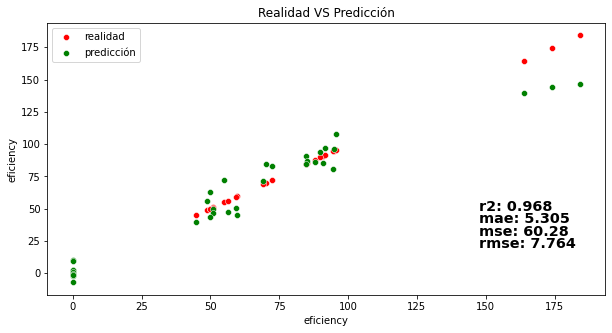

In [10]:
Predicting.cross_val_regression(LinearRegression(),x_train,y_train,x_test,y_test,"no")

Usando todas las variables obtenemos datos muy buenos con Linear Regression de sklearn y con ols de statsmodels. En statsmodels el r^2 se situa en 0.981 y en sklearn en 0.968.Veamos que nos sugiere la selección de variables automática de rfecv. Por otra parte, statsmodels nos dice que existen algunas de las variables que son estadísticamente iguales a 0 y por tanto podrían ser eliminadas del modelo, quedando igual o incluso mejorandolo. Veamos a que variables se refiere cada uno de ellos y realicemos sus modelos:

In [11]:

rfecv = RFECV(estimator=LinearRegression(),step=1,cv=10,scoring="r2",n_jobs=-1)
rfecv.fit(x_train,y_train)
print("Número óptimo de variables: %d" % rfecv.n_features_)
print('Variables a seleccionar: %s' % list(x_train.columns[rfecv.support_]))
print(f"El ranking de las variables es {rfecv.ranking_}")
prediction =rfecv.predict(x_test)
print("="*60)
print(f"r2: {r2_score(y_test,prediction)}")
print(f"mae: {mean_absolute_error(y_test,prediction)}")
print(f"mse: {mean_squared_error(y_test,prediction)}")
print(f"rmse: {mean_squared_error(y_test,prediction)**(1/2)}")

Número óptimo de variables: 5
Variables a seleccionar: ['gdp', 'energy_production', 'energy_consumption', 'co2_emission', 'per_capita_production']
El ranking de las variables es [1 3 1 1 1 1 2 7 4 8 6 5]
r2: 0.9498034490987297
mae: 7.922480455058246
mse: 122.03287072084204
rmse: 11.046848904590034


Mediante RFECV el r2 es muy parecido que con 12 variables, así como el resto de datos que tienen un margen de empeoramiento asumible para la enorme simplificación que nos genera del modelo.

In [12]:
rfecv_eliminacion = []
for i in range(len(rfecv.ranking_)):
    if rfecv.ranking_[i] != 1:
        rfecv_eliminacion.append(x_train.columns[i])
rfecv_eliminacion

['population',
 'energy_intensity_by_gdp',
 'balance',
 'energy_dependecy',
 'use_intensity_pc',
 'co2_pc',
 'energy_type']

Realizamos el mismo modelo con statsmodels para mirar que datos nos ofrece, sobre todo en aic y bic, que son dos métricas muy interesantes:

In [13]:
new_xtrain = x_train.drop(columns=rfecv_eliminacion)
new_xtest = x_test.drop(columns=rfecv_eliminacion)

model = sm.OLS(y_train_stats,new_xtrain.values)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.960    
Dependent Variable:     y                AIC:                         -51.5745 
Date:                   2022-08-17 21:05 BIC:                         -36.5214 
No. Observations:       150              Log-Likelihood:              30.787   
Df Model:               5                F-statistic:                 717.7    
Df Residuals:           145              Prob (F-statistic):          2.36e-100
R-squared (uncentered): 0.961            Scale:                       0.040177 
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1          -0.0919        0.0956      -0.9606      0.3384      -0.2809       0.0972
x2          -0.6954        0.1185      -5.8683      0.0000      -0.9296      -0.4612
x3           0.4546        0.1329       3.4207      0.0008       0.1919       0.7173
x4           1.1175        0.0288      38.8650      0.0000       1.0607       1.1744
x5           0.0767        0.0982       0.7807      0.4362      -0.1175       0.2709
-------------------------------------------------------------------------------
Omnibus:                   6.324             Durbin-Watson:               2.277
Prob(Omnibus):             0.042             Jarque-Bera (JB):            3.142
Skew:                      -0.032            Prob(JB):                    0.208
Kurtosis:                  2.294             Condition No.:               19   
===============================================================================

"""

usando las 5 variables con statsmodels vemos que el aic y el bic sube algo, por lo que el modelo explica las variaciones de la variable dependiente algo peor que el otro, pero hemos bajado la complejidad bastante en ambos casos.

Por otra parte, siguiendo con el modelo de 12 variables creado con statsmodels al principio, veamos como se comporta si eliminamos las variables que nos decía que no son relevantes:

In [23]:
indice_variables = pd.Series(x_train.columns)
statsmodels_eliminar = indice_variables[[0,5]].values # eliminamos las variables estadísticamente iguales a 0 según statsmodels

In [25]:
nuevo_xtrain = x_train.drop(columns=statsmodels_eliminar)
model2 = sm.OLS(y_train_stats,nuevo_xtrain.values)
results2 = model2.fit()
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.980    
Dependent Variable:     y                AIC:                         -154.1652
Date:                   2022-08-17 20:42 BIC:                         -127.0694
No. Observations:       150              Log-Likelihood:              86.083   
Df Model:               9                F-statistic:                 827.5    
Df Residuals:           141              Prob (F-statistic):          2.46e-117
R-squared (uncentered): 0.981            Scale:                       0.019766 
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1          -0.1807        0.0591      -3.0562      0.0027      -0.2975      -0.0638
x2          -0.4879        0.1207      -4.0412      0.0001      -0.7266      -0.2492
x3           0.7213        0.1191       6.0547      0.0000       0.4858       0.9568
x4           1.0170        0.0431      23.6201      0.0000       0.9319       1.1021
x5           0.0650        0.0504       1.2899      0.1992      -0.0346       0.1645
x6           0.0471        0.0181       2.6033      0.0102       0.0113       0.0828
x7          -0.4550        0.0558      -8.1525      0.0000      -0.5654      -0.3447
const        0.0000        0.0000       4.8286      0.0000       0.0000       0.0000
x8          -0.0784        0.0268      -2.9251      0.0040      -0.1314      -0.0254
x9           0.1609        0.0393       4.0933      0.0001       0.0832       0.2386
-------------------------------------------------------------------------------
Omnibus:              6.987       Durbin-Watson:          2.260                
Prob(Omnibus):        0.030       Jarque-Bera (JB):       6.724                
Skew:                 0.437       Prob(JB):               0.035                
Kurtosis:             3.558       Condition No.:          100274903082847125504
===============================================================================
* The condition number is large (1e+20). This might indicate             strong
multicollinearity or other numerical problems.
"""

Con statsmodel eliminando las variables que estadísticamente son cero y por tanto no aportan nada, nos queda el modelo con el mismo r2 que con todas las variables y mejora algo el aic y el bic, por lo que este modelo sería mejor al tener una complejidad menor y métricas similares.
Vamos a realizar una selección manual, viendo el vif y la correlación:

In [16]:
correlaciones = df_china[[col for col in df_china.columns if col != "use_intensity_pc"]].corr()
px.imshow(correlaciones,text_auto=True,aspect="auto",title="Matriz de Correlaciones")

In [17]:
eleccion_corr = correlaciones.loc[abs(correlaciones.eficiency) >= 0.45,"eficiency"]
eleccion_corr

energy_production     0.454408
energy_consumption    0.549682
co2_emission          0.524267
balance              -0.691284
eficiency             1.000000
co2_pc                0.531881
energy_type           0.825001
Name: eficiency, dtype: float64

En teoría las mejores variables con las que nos podríamos quedar serían 6, vamos a ver el vif entre todas las variables, para ver cuales quedarían:

Empezamos usando todas las variables para ver cuales se podrían eliminar:

<mark>ELIMINAR LA NOTACIÓN CIENTIFICA</mark>

In [30]:
variables = [col for col in df_china.columns if col not in ["country","use_intensity_pc"]]
Predicting.compute_vif(df_china,variables)

,Variable,VIF
3,energy_consumption,2.488150e+09
2,energy_production,2.187190e+09
7,balance,7.959995e+07
1,population,2.599200e+02
6,energy_intensity_by_gdp,1.418100e+02
4,co2_emission,1.325200e+02
5,per_capita_production,8.364000e+01
10,co2_pc,6.816000e+01
0,gdp,3.278000e+01
8,eficiency,1.201000e+01


Si solo elegimos las variables que nos ha dado mejor correlación, el vif de las variables sería alto en casi todas ellas y por tanto sí que tendríamos multicolinealidad.

In [18]:
variables = [col for col in eleccion_corr.index if col != "eficiency"]
df_corr = Predicting.compute_vif(df_china,variables)
df_corr

,Variable,VIF
1,energy_consumption,2.339041e+09
0,energy_production,2.056149e+09
3,balance,7.482741e+07
2,co2_emission,8.803486e+01
4,co2_pc,5.055477e+01
5,energy_type,1.716874e+00


Vayamos eliminando una por una hasta eliminar o reducir la multicolinealidad:

In [20]:
variables = [col for col in df_china.columns if col not in ["country","use_intensity_pc"]]
df_vif = Predicting.sin_multico_unoauno(df_china,variables)
df_vif

,Variable,VIF
0,per_capita_production,2.875
1,energy_type,2.869
2,energy_dependecy,2.778
3,energy_intensity_by_gdp,2.385
4,energy_production,2.069
5,balance,1.859


In [21]:
# variables diferentes:
for var in df_corr.Variable.to_list():
    if var in df_vif.Variable.to_list():
        print(var)

energy_production
balance
energy_type


Vemos que nos deja el mismo número de variables que solo eligiendo por correlación. De las que elegimos por correlación se han mantenido:
* energy_production
* balance
* energy_type

El resto son diferentes, vamos a ver como estos dos modelos por separado lo hacen:
### A. MODELO CON VARIABLES VIF:

In [24]:
x = df_china[df_vif.Variable.values]
y = df_china.eficiency
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)


In [25]:
power_trans = PowerTransformer()
x_train = power_trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train,columns=power_trans.get_feature_names_out())
x_test = power_trans.transform(x_test)
x_test = pd.DataFrame(x_test,columns=power_trans.get_feature_names_out())

In [26]:
y_train_stats = power_trans.fit_transform(y_train.values.reshape(-1,1))
y_test_stats = power_trans.fit_transform(y_test.values.reshape(-1,1))

In [27]:
model = sm.OLS(y_train_stats,x_train.values)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.886   
Dependent Variable:     y                AIC:                         105.7921
Date:                   2022-08-17 21:12 BIC:                         123.8559
No. Observations:       150              Log-Likelihood:              -46.896 
Df Model:               6                F-statistic:                 195.3   
Df Residuals:           144              Prob (F-statistic):          1.40e-66
R-squared (uncentered): 0.891            Scale:                       0.11398 
-----------------------------------------------------------------------------------
           Coef.       Std.Err.         t          P>|t|        [0.025       0.975]
-----------------------------------------------------------------------------------
x1        -0.2810        0.0752       -3.7361      0.0003      -0.4296      -0.1323
x2         1.0493        0.0429       24.4511      0.0000       0.9645       1.1341
x3        -1.0715        0.0983      -10.9049      0.0000      -1.2657      -0.8773
x4         0.2654        0.0692        3.8359      0.0002       0.1287       0.4022
x5         0.9166        0.0925        9.9108      0.0000       0.7338       1.0994
x6        -0.1211        0.0345       -3.5149      0.0006      -0.1892      -0.0530
------------------------------------------------------------------------------
Omnibus:                  112.604          Durbin-Watson:             1.615   
Prob(Omnibus):            0.000            Jarque-Bera (JB):          1262.863
Skew:                     -2.562           Prob(JB):                  0.000   
Kurtosis:                 16.259           Condition No.:             8       
==============================================================================

"""

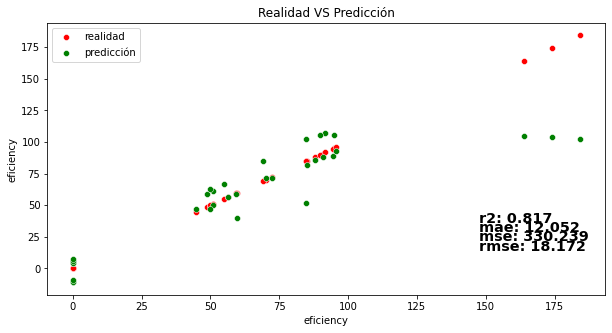

In [28]:
Predicting.cross_val_regression(LinearRegression(),x_train,y_train,x_test,y_test)

Ahora vamos a crear un modelo con las variables obtenidas mediante los coeficientes de correlación:

In [29]:
x = df_china[[col for col in eleccion_corr.index if col != "eficiency"]] # en este modelo sí existía multicolinealidad
y = df_china.eficiency
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

In [30]:
power_trans = PowerTransformer()
x_train = power_trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train,columns=power_trans.get_feature_names_out())
x_test = power_trans.transform(x_test)
x_test = pd.DataFrame(x_test,columns=power_trans.get_feature_names_out())

In [31]:
y_train_stats = power_trans.fit_transform(y_train.values.reshape(-1,1))
y_test_stats = power_trans.fit_transform(y_test.values.reshape(-1,1))

In [32]:
model = sm.OLS(y_train_stats,x_train.values)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.971    
Dependent Variable:     y                AIC:                         -98.2443 
Date:                   2022-08-17 21:24 BIC:                         -80.1804 
No. Observations:       150              Log-Likelihood:              55.122   
Df Model:               6                F-statistic:                 830.8    
Df Residuals:           144              Prob (F-statistic):          4.87e-109
R-squared (uncentered): 0.972            Scale:                       0.029246 
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1          -0.8772        0.1310      -6.6975      0.0000      -1.1360      -0.6183
x2           0.7343        0.1403       5.2339      0.0000       0.4570       1.0116
x3           1.2091        0.0441      27.4467      0.0000       1.1221       1.2962
x4           0.0446        0.0213       2.0882      0.0385       0.0024       0.0867
x5          -0.1967        0.0271      -7.2660      0.0000      -0.2502      -0.1432
x6          -0.0132        0.0383      -0.3450      0.7306      -0.0890       0.0626
-------------------------------------------------------------------------------
Omnibus:                    6.720            Durbin-Watson:               2.372
Prob(Omnibus):              0.035            Jarque-Bera (JB):            6.095
Skew:                       0.424            Prob(JB):                    0.047
Kurtosis:                   2.494            Condition No.:               28   
===============================================================================

"""

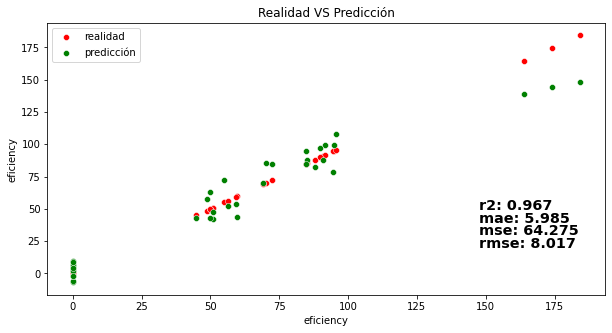

In [33]:
Predicting.cross_val_regression(LinearRegression(),x_train,y_train,x_test,y_test)

# CONCLUSIÓN
<mark>CAMBIAR LAS CONCLUSIONES</mark>

Dada la excelente bondad en el ajuste y por tanto, a la capacidad explicativa de las fluctuaciones en la eficiencia mediante el modelo de 6 variables elaborado con aquellas que  tienen mayor correlación con ella, así como los buenos datos de error absoluto medio y error cuadrático medio respecto a los modelos anteriores, hemos decidido que estas serán las variables que conformarán nuestro modelo de regresión. Esto viene motivado por lo siguiente:

1. Tiene mejor r2 que el modelo de 6 variables seleccionado mediante el vif (0.967>0.817), tiene mejor r2 que el modelo de 5 variables seleccionado mediante rfecv (0.967>0.9498) y muy cercano al de 11 variables (0.967<0.968)

2. el AIC y el BIC, que nos muestra una medida entre la complejidad de nuestro modelo y la calidad de ajuste del modelo, o la capacidad que tiene de expicar los datos, nos indica que nuestro modelo de 6 variables tiene unos datos que son mucho mejores que el modelo de 6 variables seleccionado mediante vif; también mejores, siendo una bajada significativa, pero no tan grande como en el modelo de 6 variables vif, en el modelo de 5 variables seleccionadas con rfecv y con un aumento respecto a los modelos de 11 y 9 variables que es asumible dada la gran reducción de complejidad que supone el modelo respecto a estos. Por tanto vemos que esta reducción en la complejidad del modelo, con el ánimo de que pueda generalizar bien para otros datos, que no sean los del estudio, compensa de manera suficiente la posible pérdida en representación explicativa de nuestro datos concretos de estudio.  

3. Los valores de mae, mse y rmse son muy parecidos al modelo de 11 variables y mejores que los de 5 variables y 6 variables seleccionadas mediante vif.

In [34]:
golden_variables = [col for col in eleccion_corr.index if col != "eficiency"]
golden_variables

['energy_production',
 'energy_consumption',
 'co2_emission',
 'balance',
 'co2_pc',
 'energy_type']

In [35]:
df_preselec = df_2[eleccion_corr.index]
df_selec = df_2[["year","country"]]
df_selec_final = pd.merge(df_selec,df_preselec,left_index=True,right_index=True)
df_selec_final.head()

,year,country,energy_production,energy_consumption,co2_emission,balance,eficiency,co2_pc,energy_type
0,1980-01-01,Venezuela,0.150,0.155,0.0,-0.005,0.0,0.0,0
1,1980-01-01,Venezuela,5.000,0.812,0.0,4.188,0.0,0.0,3
2,1980-01-01,Venezuela,0.616,0.616,0.0,0.000,0.0,0.0,2
3,1980-01-01,Venezuela,0.001,0.002,0.0,-0.000,0.0,0.0,4
4,1981-01-01,Venezuela,0.156,0.161,0.0,-0.005,0.0,0.0,0


In [38]:
name = "df_goldenvars_noscaled.csv"
path = "C:/Users/ferna/OneDrive/Documentos/MIS_COSAS_DE_THE_BRIDGE/Proyectos_Machine_Learning/co2_ml/src/data/processed/"
df_selec_final.to_csv(path + name,header=True,index=False)